In [ ]:
__nbid__ = '0031'
__author__ = 'Robert Nikutta <robert.nikutta@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>, Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20240714' # yyyymmdd
__datasets__ = ['smash_dr2']
__keywords__ = ['science example', 'lightcurve', 'time-series', 'Lomb-Scargle', 'period', 'vospace:copy', 'RRLyrae']

# Analisis de Series de Tiempo de una RR Lyrae star
*Robert Nikutta & the Astro Data Lab Team*

### Tabla de Contenido
* [Objetivos](#goals)
* [Resumen](#summary)
* [Avisos Legales & atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Consultar curvas de luz del sondeo SMASH](#querysmash)
* [Convertir resultado a un formato conveniente](#convert)
* [Gráficar RA vs. Dec](#scatterplot)
* [Gráficar series temporales](#plottimeseries)
* [Encontrar periodo (Lomb-Scargle)](#lombscargle)
* [Plegar y graficar la curva de luz](#fold)
* [Combinar todo](#combine)
* [Almacenar datos en un archivo local](#storelocal)
* [Copiar datos a tu vospace](#copytovospace)
* [Ideas adicionales](#ideas)
* [Recursos y referencias](#resources)


# Objetivos
* Consultar Data Lab para la serie temporal de una estrella variable (conocida)
* Crear gráficos de diagnóstico sencillos de los datos
* Encontrar el período de variabilidad mediante el periodograma de Lomb-Scargle
* Definir la fase de la serie temporal y graficar la curva de luz
* Combinar los pasos del análisis en una sola rutina
* Almacenar los datos resultantes en un archivo local
* Copiar los datos al espacio de almacenamiento virtual remoto

<a class="anchor" id="summary"></a>
# Resumen
Estudiaremos la variabilidad de un objeto astrofísico en función del tiempo. En la galaxia enana Hydra II, un objeto es una estrella RR Lyrae. Obtendremos su curva de luz de la tabla `source` del sondeo SMASH y elaboraremos el análisis paso a paso.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [26]:
# Librerías estandar
from getpass import getpass

# Terceros
import numpy as np
import pylab as plt
from astropy import timeseries, units as u
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc
from dl.helpers.utils import convert

# Configuración del graficado
fontsize = 14
plt.rcParams['font.size'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize

<a class="anchor" id="login"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "), getpass("Ingrese su contraseña:: (+ENTER) "))
ac.whoAmI()

<a class="anchor" id="querysmash"></a>
# Consultar curvas de luz del sondeo SMASH
Recuperamos todas las magnitudes calibradas de un objeto específico, para todas las bandas y todas las épocas, de la tabla `fuente`.

In [27]:
# ID único de una estrella RR Lyrae en la galaxia enana Hydra II
objID = '169.429960'

# Seleccionar columnas: RA, Dec, fecha juliana modificada, magnitud calibrada, incertidumbres, banda de filtro
# Nota: Esta tabla de la base de datos codifica los valores 'sin medición' como 99,99
# Ordenar las filas devueltas en orden ascendente de fecha juliana modificada

query = """SELECT id,ra,dec,mjd,cmag,cerr,filter
           FROM smash_dr2.source
           WHERE id='{:s}' AND cmag<99
           ORDER BY mjd ASC""".format(objID)
result = qc.query(query) # Por omisión, el resultado es una cadena en formato CSV

<a class="anchor" id="convert"></a>
# Convertir resultado a un formato conveniente
El resultado de la consulta es una cadena larga. Lo convertiremos a un formato más práctico, por ejemplo, un dataframe de Pandas. Una función auxiliar de Data Lab lo logra muy fácilmente.

In [28]:
df = convert(result,'pandas')
print("Número de filas:", df.size)
print(df.head()) # Imprime las primeras filas

Número de filas: 2667
          id          ra        dec           mjd       cmag      cerr filter
0  169.42996  185.431155 -31.995327  56371.327538  21.433147  0.020651      g
1  169.42996  185.431146 -31.995324  56371.328563  21.231598  0.022473      r
2  169.42996  185.431139 -31.995320  56371.329582  21.149094  0.026192      i
3  169.42996  185.431142 -31.995334  56371.330610  21.237938  0.045429      z
4  169.42996  185.431145 -31.995325  56371.331633  21.346725  0.015112      g


Ahora se puede acceder a las columnas de la tabla por nombre, por ejemplo:

In [29]:
df['ra'][:3] # Imprimir los 3 primeros elementos de la columna RA

0    185.431155
1    185.431146
2    185.431139
Name: ra, dtype: float64

<a class="anchor" id="scatterplot"></a>
# Graficar RA vs Dec
Definimos una pequeña función para graficar. Puede reutilizarse posteriormente.

In [30]:
def graficar_dispersion(x,y,ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(5,5))
    
    # apply units
    x = (x*u.deg).to('arcsec')
    y = (y*u.deg).to('arcsec')
    
    ax.plot(x-np.median(x),y-np.median(y),'bo',ms=3,alpha=0.6)
    ax.set_xlabel('RA offset ({:s})'.format(x.unit))
    ax.set_ylabel('DEC offset ({:s})'.format(y.unit))
    ax.axvline(0,c='0.5',lw=1)
    ax.axhline(0,c='0.5',lw=1)

Grafica las coordenadas RA y Dec de todas las observaciones de nuestra fuente. Se dispersan alrededor de la posición media:

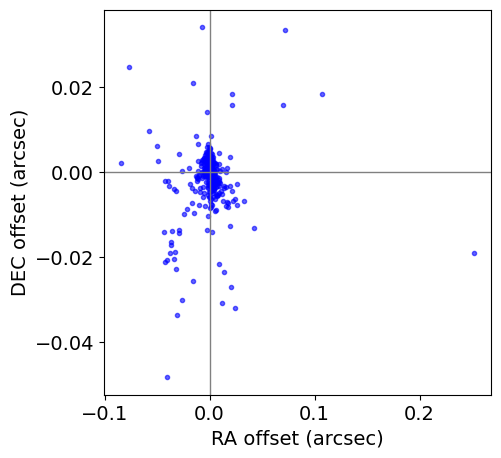

In [31]:
graficar_dispersion(df['ra'].values,df['dec'].values)

<a class="anchor" id="plottimeseries"></a>
# Graficar series temporales
Grafica las curvas de luz de esta fuente para cualquier banda seleccionada. También ampliamos un rango de fechas con mediciones agrupadas.

In [32]:
# Definir una función para seleccionar solo mediciones en una banda.
def get_data(df,band='g'):
    sel = (df['filter'] == band)    
    t = df['mjd'][sel].values
    y = df['cmag'][sel].values
    dy = df['cerr'][sel].values
    return t,y,dy # retorna tiempo, magnitudes en una banda, incertidumbres

In [33]:
t,y,dy = get_data(df,'g')  # seleccionar una banda

# Una función reutilizable para graficar la curva de luz.
def plot_raw_lightcurve(t,y,dy,title='',ax=None,lperc=13,rperc=99):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,7))
    
    jd0 = t.min() # Desplazamiento de fecha juliana modificada
    t = t-jd0 # Primera fecha de observaciones = 0
    
    axins = inset_axes(ax, 3.5, 1.3, loc=9) # Crear un objeto de ejes insertados.
    
    left = np.percentile(t,lperc)
    right = np.percentile(t,rperc)
    ax.errorbar(t,y,yerr=dy,marker='.',ms=8,ls='none',color='g',lw=1,alpha=0.5,label='')
    axins.errorbar(t,y,yerr=dy,marker='.',ms=8,ls='none',color='g',lw=1,alpha=0.5,label='')
    axins.set_xlim(0.9999*left,1.0001*right)
    axins.xaxis.set_major_locator(MaxNLocator(4))

    # Tareas del panel principa
    ax.set_xlabel('Fecha juliana modificada - {:g} (days)'.format(jd0))
    ax.set_ylabel('Magnitud')
    ax.invert_yaxis()
    ax.set_title(title)
    #ax.legend(loc='lower left',frameon=True,ncol=1,markerscale=1.5)

    # Dibujar un recuadro alrededor de la inserción; conectar con los ejes principales
    mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5",lw=1,alpha=0.7);

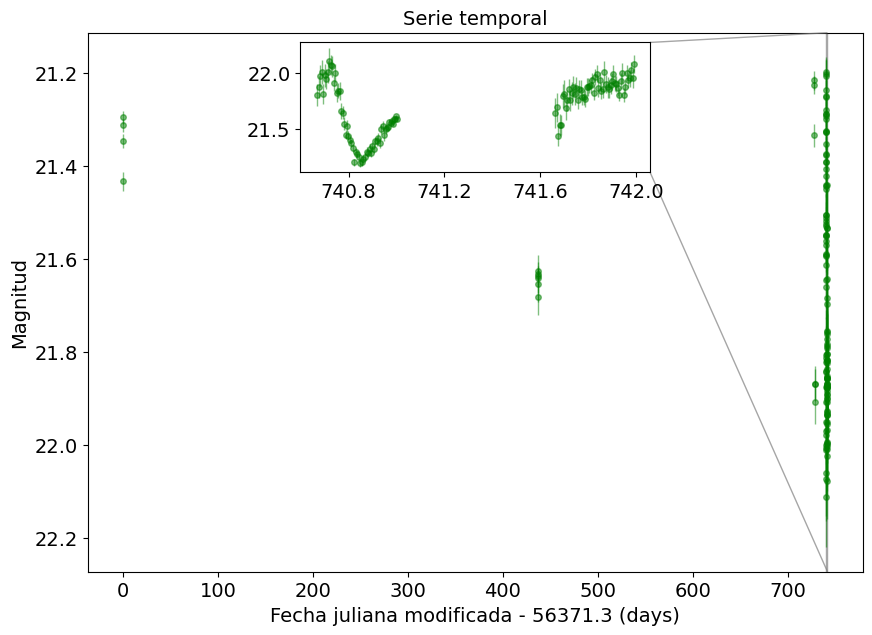

In [34]:
plot_raw_lightcurve(t,y,dy,title='Serie temporal',ax=None)

<a class="anchor" id="lombscargle"></a>
# Calcular la periodicidad.
Uno de los muchos métodos para calcular el período de una variable es el periodograma de Lomb-Scargle. Funciona en el dominio de Fourier. Lo aplicaremos aquí a todas las mediciones de nuestra estrella RR Lyrae en una banda determinada.

In [35]:
def obtener_periodograma_ls(t,y,min_freq=1./1.,max_freq=1./0.1):
    
    """Calcular el periodograma de Lomb-Scargle.
    
    Parametros
    ----------
    t : array
        Array de tiempo de observación (p. ej., MJD), ordenada ascendentemente.
    
    y : array
        Mediciones de magnitud en tiempo ``t``.
        
    min_freq, max_freq : real or None

        El buscador de períodos puede guiarse proporcionando la frecuencia mínima y máxima 
        en la señal ``y``, en unidades 1/t.
           min_freq = 1/periodo esperado más largo (en días)
           max_freq = 1/periodo esperado más corto (en días)
        Los valores por omisión son típicos para la variabilidad de RR Lyrae (RR Lyrae suele 
        tener un periodo de una fracción de un día).
        
    Retorna
    -------
    periodo : array
        Periodo en fase de la señal variable en el tiempo (fracción de la fase).
        
    potencia : array
        La potencia del periodograma como función del ``periodo``.
        
    """
    
    # Utilice la clase LombScargle de Astropy
    ls = timeseries.LombScargle(t, y)

    # Calcular el periodograma
    # Orientamos un poco el algoritmo:
    # frecuencia_mín. = 1/periodo esperado más largo (en días)
    # frecuencia_máx. = 1/periodo esperado más corto (en días)
    # Las RR Lyrae suelen tener un periodo de una fracción de un día
    frequencia, potencia = ls.autopower(minimum_frequency=min_freq,maximum_frequency=max_freq)
    periodo = 1./frequencia # period is the inverse of frequency
    
    return periodo, potencia


def obtener_mejor_periodo(periodo,potencia):
    
    """Devuelve el periodo con la mayor potencia."""
    
    return periodo[np.argmax(potencia)]

In [36]:
# Calcular el periodograma LS y, a partir de él, el mejor período
periodo, potencia = obtener_periodograma_ls(t,y)
mejor_periodo = obtener_mejor_periodo(periodo,potencia)

# Plot periodogram

In [37]:
def plot_periodogram(periodo,potencia,mejor_periodo=None,title='',ax=None):

    """Graficar un periodograma.

    Parámetros
    ----------

    periodo, potencia: array
        Los arrays unidimensionales de periodo y potencia devueltos por `:func:`get_ls_periodogram()`

    best_period: float o None
        Si es float, el valor de ``best_period`` se marcará en el gráfico.

    title: str
        Título de la figura. Predeterminado: ''.

    ax: instance o None
        Si es una instancia de la clase axis, se graficará en ese objeto. Si es None, se generarán una nueva figura y objeto axis.

    """
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,7))
        
    ax.plot(periodo,potencia,lw=0.1)
    ax.set_xlabel('Periodo (días)')
    ax.set_ylabel('Potencia Relativa')
    ax.set_title(title)
    
    if mejor_periodo is not None:
        ax.axvline(mejor_periodo,color='r');
        ax.text(0.03,0.93,'periodo = {:.3f} días'.format(mejor_periodo),transform=ax.transAxes,color='r')

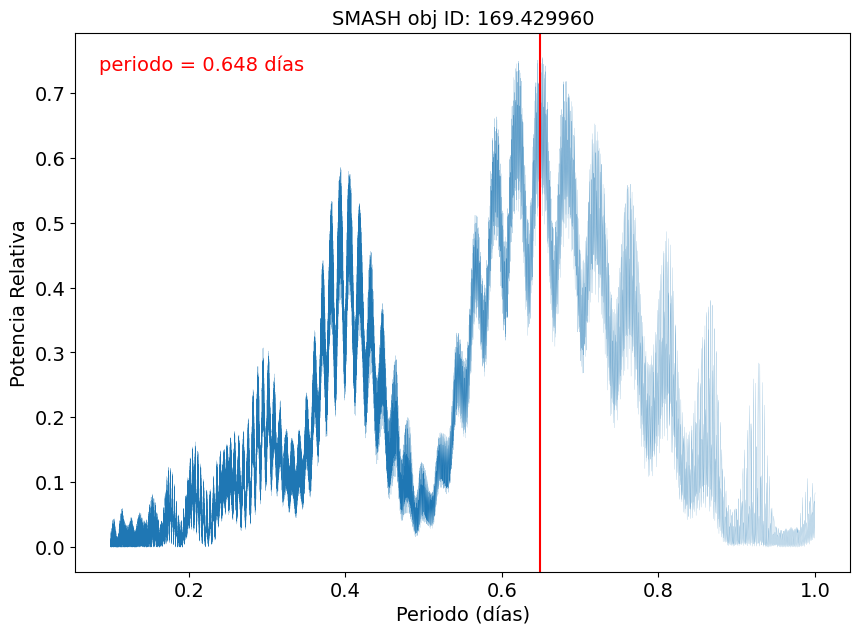

In [38]:
plot_periodogram(periodo,potencia,mejor_periodo,title='SMASH obj ID: 169.429960')

[Vivas et al. 2016](http://adsabs.harvard.edu/abs/2016AJ....151..118V) hallaron, con una técnica de minimización de dispersión de fase (¡complementaria!), un periodo de 0,645 días. **Coincidimos plenamente :-)**

<a class="anchor" id="fold"></a>
# Determinar la fase de toda la curva de luz y graficarla.
Con el periodo real calculado, podemos "determinar la fase" (o "doblaje") de la serie temporal medida para generar una curva de luz en función de la fase del periodo.

In [39]:
def get_folded_phase(t,mejor_periodo):
    
    """Doblar los tiempos de observación con el mejor periodo de la señal variable."""

    # Curva de luz sobre el peíodo, tomar el resto (es decir, la "fase" de un período).    
    phase = (t / mejor_periodo) % 1
    
    return phase

In [40]:
def plot_folded_lightcurve(t,y,mejor_periodo,dy=None,ax=None):
    
    """Graficar la curva de luz doblada.

    Parámetros
    ----------

    t, y: array
    Matrices unidimensionales de tiempo y magnitud

    mejor_periodo: float
        Periodo real de la señal.

    dy: array o None
        Si es array, los valores son las incertidumbres en ``y``, y el gráfico mostrará barras de error.
        Si es None, el gráfico no mostrará barras de error.

    ax: instance o None
        Si es una instancia de la clase axis, se graficará en ese objeto. Si es None, se generará una nueva figura y un objeto axis.
    """
   
    phase = get_folded_phase(t,mejor_periodo)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,7))
        
    marker = '.'
    ms = 10
    lw = 1
    color = 'g'
    alpha = 0.6    
    
    if dy is not None:
        ax.errorbar(phase,y,yerr=dy,marker=marker,ms=ms,ls='none',lw=lw,color=color,alpha=alpha)
    else:
        ax.plot(phase,y,marker=marker,ms=ms,ls='none',lw=lw,color=color,alpha=alpha)
            
    ax.set_title('Curva de luz en fase')
    ax.invert_yaxis()
    ax.set_xlabel('Fase (días)')
    ax.set_ylabel('Magnitud');

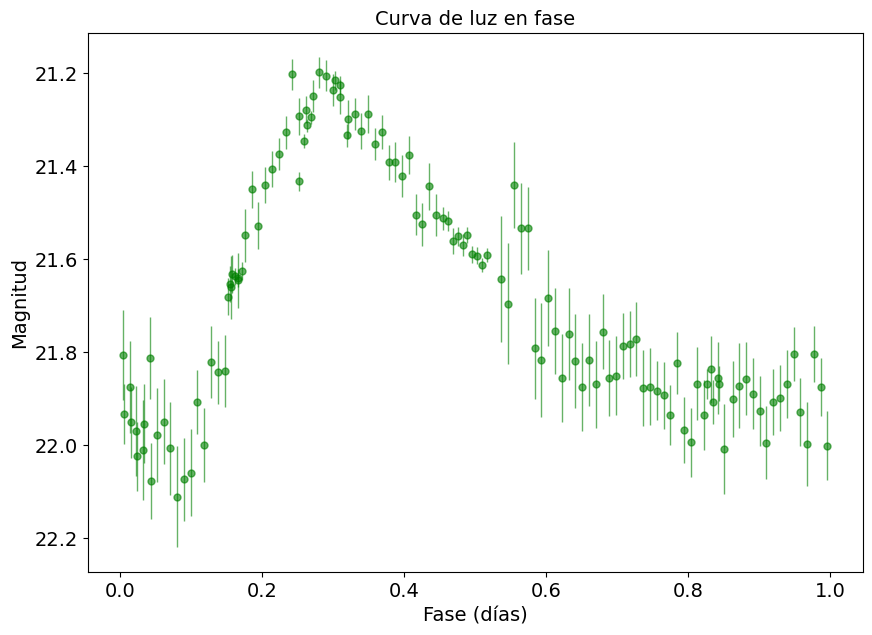

In [41]:
plot_folded_lightcurve(t,y,mejor_periodo,dy=dy)

<a class="anchor" id="combine"></a>
# Combinar todo
Con nuestras funciones modulares, ahora podemos combinar todo en un único análisis.

In [42]:
def hacer_todo(ra,dec,t,y,dy):
    # Crear figuras y ejes
    fig, axes = plt.subplots(2,2,figsize=(14,10))
    
    # Graficar datos en el cielo
    graficar_dispersion(ra,dec,ax=axes[0,0])
    
    # plot lightcurve data
    plot_raw_lightcurve(t,y,dy,ax=axes[0,1])
    
    # plot periodogram
    period, power = obtener_periodograma_ls(t,y)
    mejor_periodo = obtener_mejor_periodo(periodo,potencia)
    plot_periodogram(periodo,potencia,mejor_periodo,ax=axes[1,0])
    
    # plot folded lightcurve
    plot_folded_lightcurve(t,y,mejor_periodo,dy=dy,ax=axes[1,1])
    
    fig.subplots_adjust(hspace=0.35,wspace=0.35)

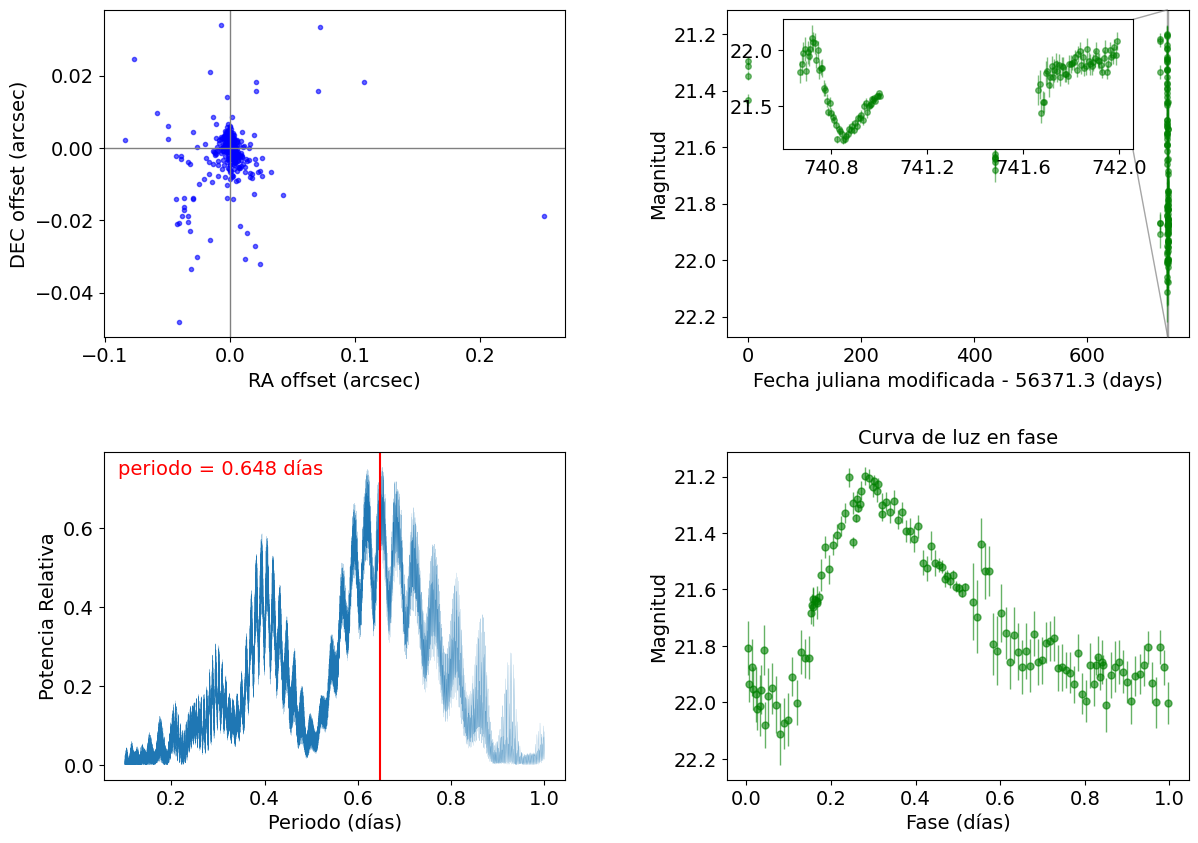

In [43]:
hacer_todo(df['ra'].values,df['dec'].values,t,y,dy)

# Empaque su código de análisis en un archivo fuente Python simple, impórtelo y ejecútelo aquí.
Todas las funciones definidas anteriormente se pueden incluir en el archivo de código fuente Python y, por lo tanto, se pueden transferir fácilmente a otra máquina, ejecutar en otro lugar o importar y volver a ejecutar en otro momento. Aquí, colocamos todas las funciones en el archivo [`timeseries.py`](timeseries.py). Para reutilizar el código, simplemente impórtelo y ejecute la función de nivel superior `do_everything` con sus datos de ra, dec, tiempo y magnitud. Debería realizar todo el análisis de una sola vez.

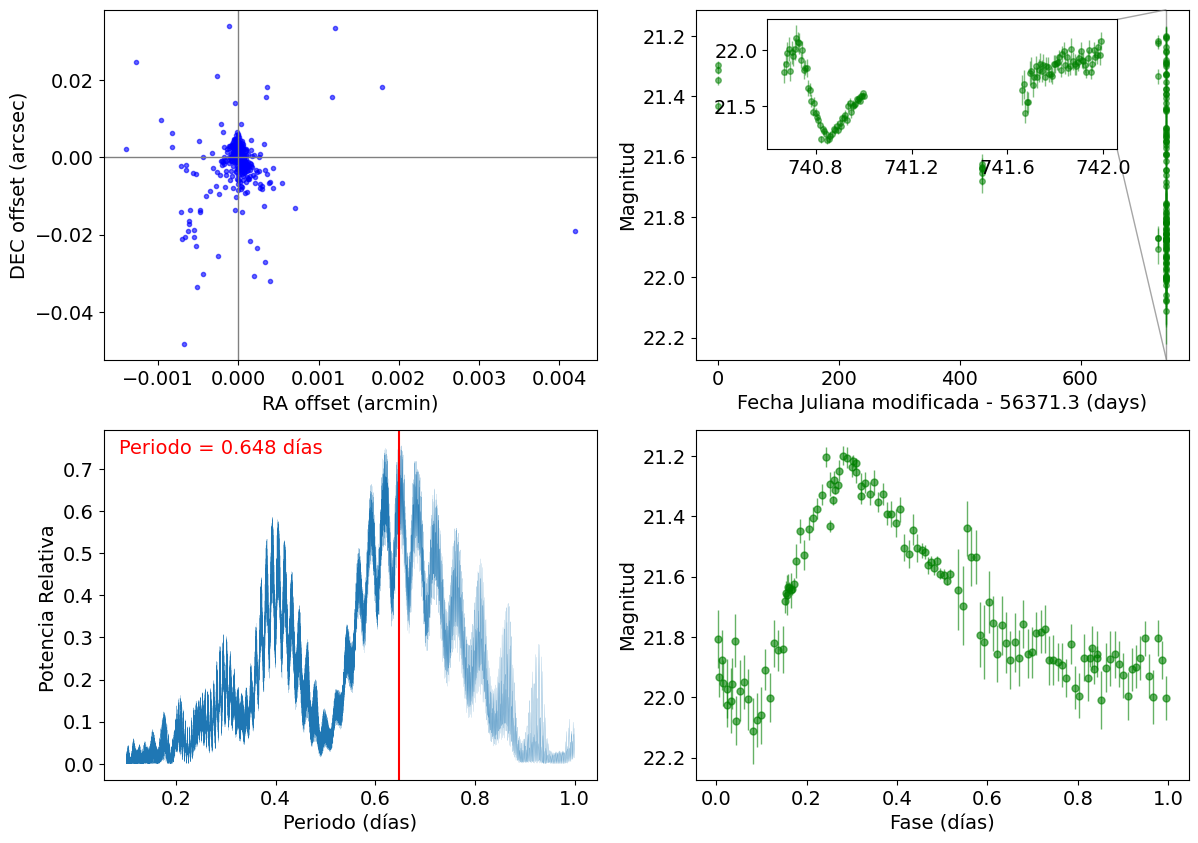

In [44]:
import timeseries
timeseries.do_everything(df['ra'].values,df['dec'].values,t,y,dy) # Llamado con ra,dec,time,mag(=y),magerr(=dy)

<a class="anchor" id="storelocal"></a>
# Almacena el marco de datos en un archivo local.
Puedes exportar fácilmente los datos con los que has estado trabajando, por ejemplo, a un archivo CSV local.

In [45]:
df.to_csv('./timeseries.csv',index=False)

**Abre o descarga el archivo local:** [timeseries.csv](timeseries.csv)

<a class="anchor" id="copytovospace"></a>
# Copia el archivo local a tu espacio de almacenamiento virtual (vospace).
Si inicia sesión en Data Lab (como se mencionó anteriormente), tiene acceso a su propio espacio de almacenamiento remoto llamado *vospace*. Copiaremos el archivo local allí para que siempre pueda acceder a él más tarde, ¡incluso desde otra computadora!

In [46]:
print("Copiando archivo a Vospace:               ",end="")
sc.put(fr='./timeseries.csv',to='vos://timeseries.csv') # Esto copia el archivo local a su Vospace remoto.

Copiando archivo a Vospace:               (1 / 1) ./timeseries.csv -> vos://timeseries.csv


['OK']

<a class="anchor" id="ideas"></a>
# Otras ideas

- Ajuste de modelos físicos de las pulsaciones de RR Lyrae

- Ajuste basado en plantillas

- Ejecutar análisis en otras estrellas variables

- Identificar otras variables

<a class="anchor" id="resources"></a>
# Recursos y referencias

Lomb, N.R. (1976) "Least-squares frequency analysis of unequally spaced data". Astrophysics and Space Science. 39 (2): 447–462: http://adsabs.harvard.edu/abs/1976Ap%26SS..39..447L

Nidever et al. (2021) "The Second Data Release of the Survey of the MAgellanic Stellar History (SMASH)". The Astronomical Journal. 161, 74: https://ui.adsabs.harvard.edu/abs/2021AJ....161...74N

Scargle, J. D. (1982) "Studies in astronomical time series analysis. II - Statistical aspects of spectral analysis of unevenly spaced data". Astrophysical Journal. 263, 835: http://adsabs.harvard.edu/doi/10.1086/160554

Vivas et al. 2016 (2016, AJ, 151, 118) "Variable Stars in the Field of the Hydra II Ultra-Faint Dwarf Galaxy": http://adsabs.harvard.edu/abs/2016AJ....151..118V

Jake VanderPlas' blog on Lomb-Scargle periodograms and on fitting RR Lyrae lightcurves with templates: https://jakevdp.github.io/blog/2015/06/13/lomb-scargle-in-python/

Lomb-Scargle periodograms in `astropy`: https://docs.astropy.org/en/stable/timeseries/lombscargle.html

RR Lyrae variables on wikipedia: https://en.wikipedia.org/wiki/RR_Lyrae_variable